In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("kyphosis.csv")

In [4]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


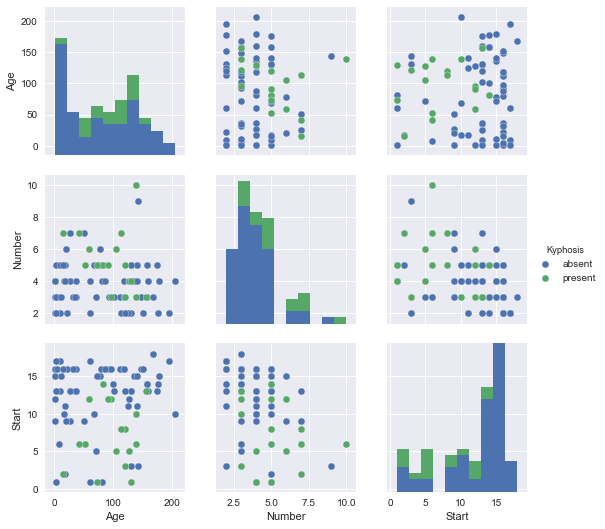

In [7]:
sns.pairplot(df,hue="Kyphosis")

In [43]:
from sklearn.cross_validation import train_test_split


In [44]:
X=df.drop("Kyphosis",axis=1)
y=df['Kyphosis']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3)

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dtree = DecisionTreeClassifier()

In [48]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [49]:
predicitions = dtree.predict(X_test)

In [50]:
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
print(confusion_matrix(y_test,predicitions))
print("\n")
print(classification_report(y_test,predicitions))

[[16  2]
 [ 5  2]]


             precision    recall  f1-score   support

     absent       0.76      0.89      0.82        18
    present       0.50      0.29      0.36         7

avg / total       0.69      0.72      0.69        25



In [52]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

In [57]:
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

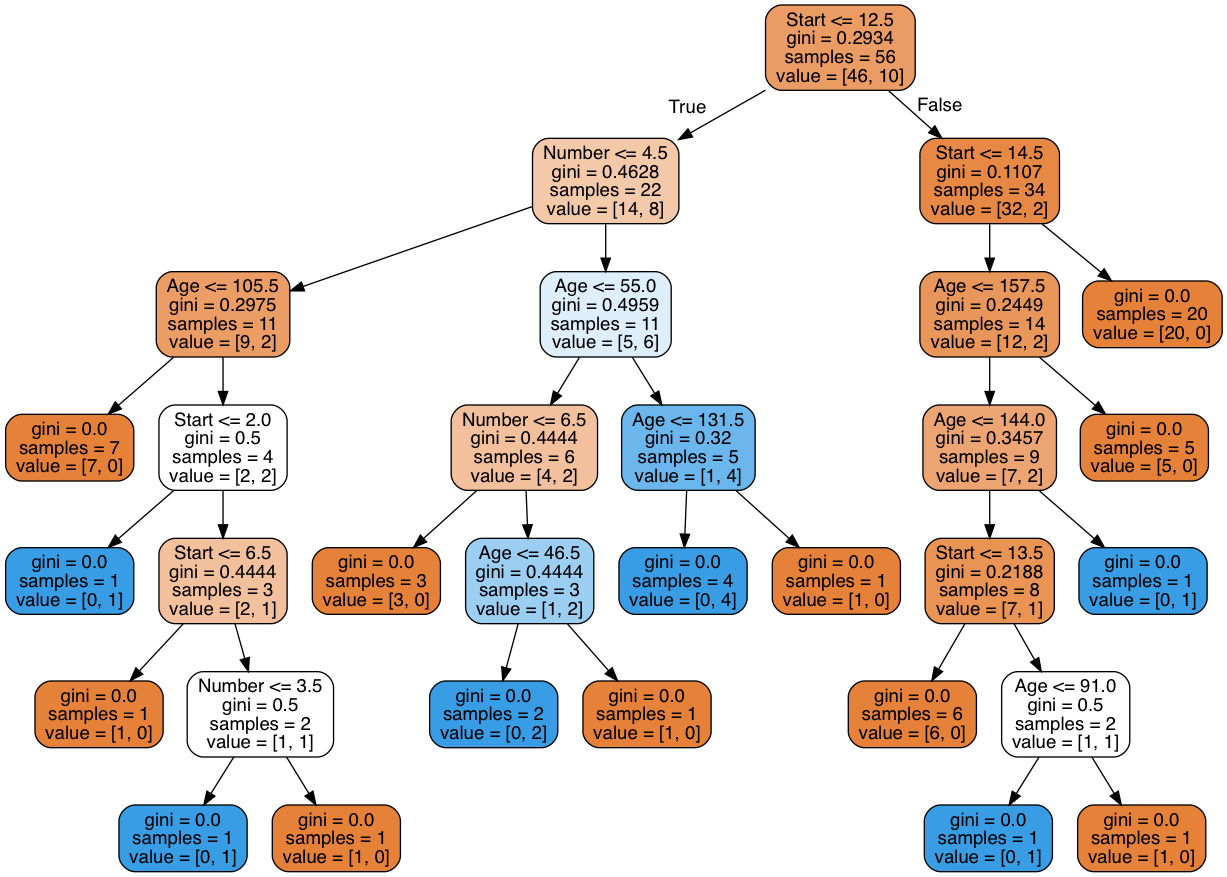

In [58]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rfc = RandomForestClassifier(n_estimators=300)

In [37]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [38]:
rfc_pred = rfc.predict(X_test)

In [39]:
print(confusion_matrix(y_test,rfc_pred))
print("\n")
print(classification_report(y_test,rfc_pred))

[[17  1]
 [ 6  1]]


             precision    recall  f1-score   support

     absent       0.74      0.94      0.83        18
    present       0.50      0.14      0.22         7

avg / total       0.67      0.72      0.66        25



In [42]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64